# Comprehensive Exploratory Data Analysis (EDA)

This notebook performs a thorough analysis of the Adult dataset, exploring patterns, distributions, and relationships in the data. We'll examine both numerical and categorical features, check for data quality issues, and create insightful visualizations to understand what influences income levels.

EXPLORATORY DATA ANALYSIS - ADULT DATASET (UCI)
--------------------------------------------------------------------------------

1. DATASET OVERVIEW
Dataset Shape: (39073, 15)
Number of Rows: 39073
Number of Columns: 15
--------------------------------------------------------------------------------

2. COLUMN INFORMATION
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39073 entries, 0 to 39072
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              39073 non-null  int64 
 1   workclass        39073 non-null  object
 2   fnlwgt           39073 non-null  int64 
 3   education        39073 non-null  object
 4   educational-num  39073 non-null  int64 
 5   marital-status   39073 non-null  object
 6   occupation       39073 non-null  object
 7   relationship     39073 non-null  object
 8   race             39073 non-null  object
 9   gender           39073 non-null  object
 10  capital-gain     3907

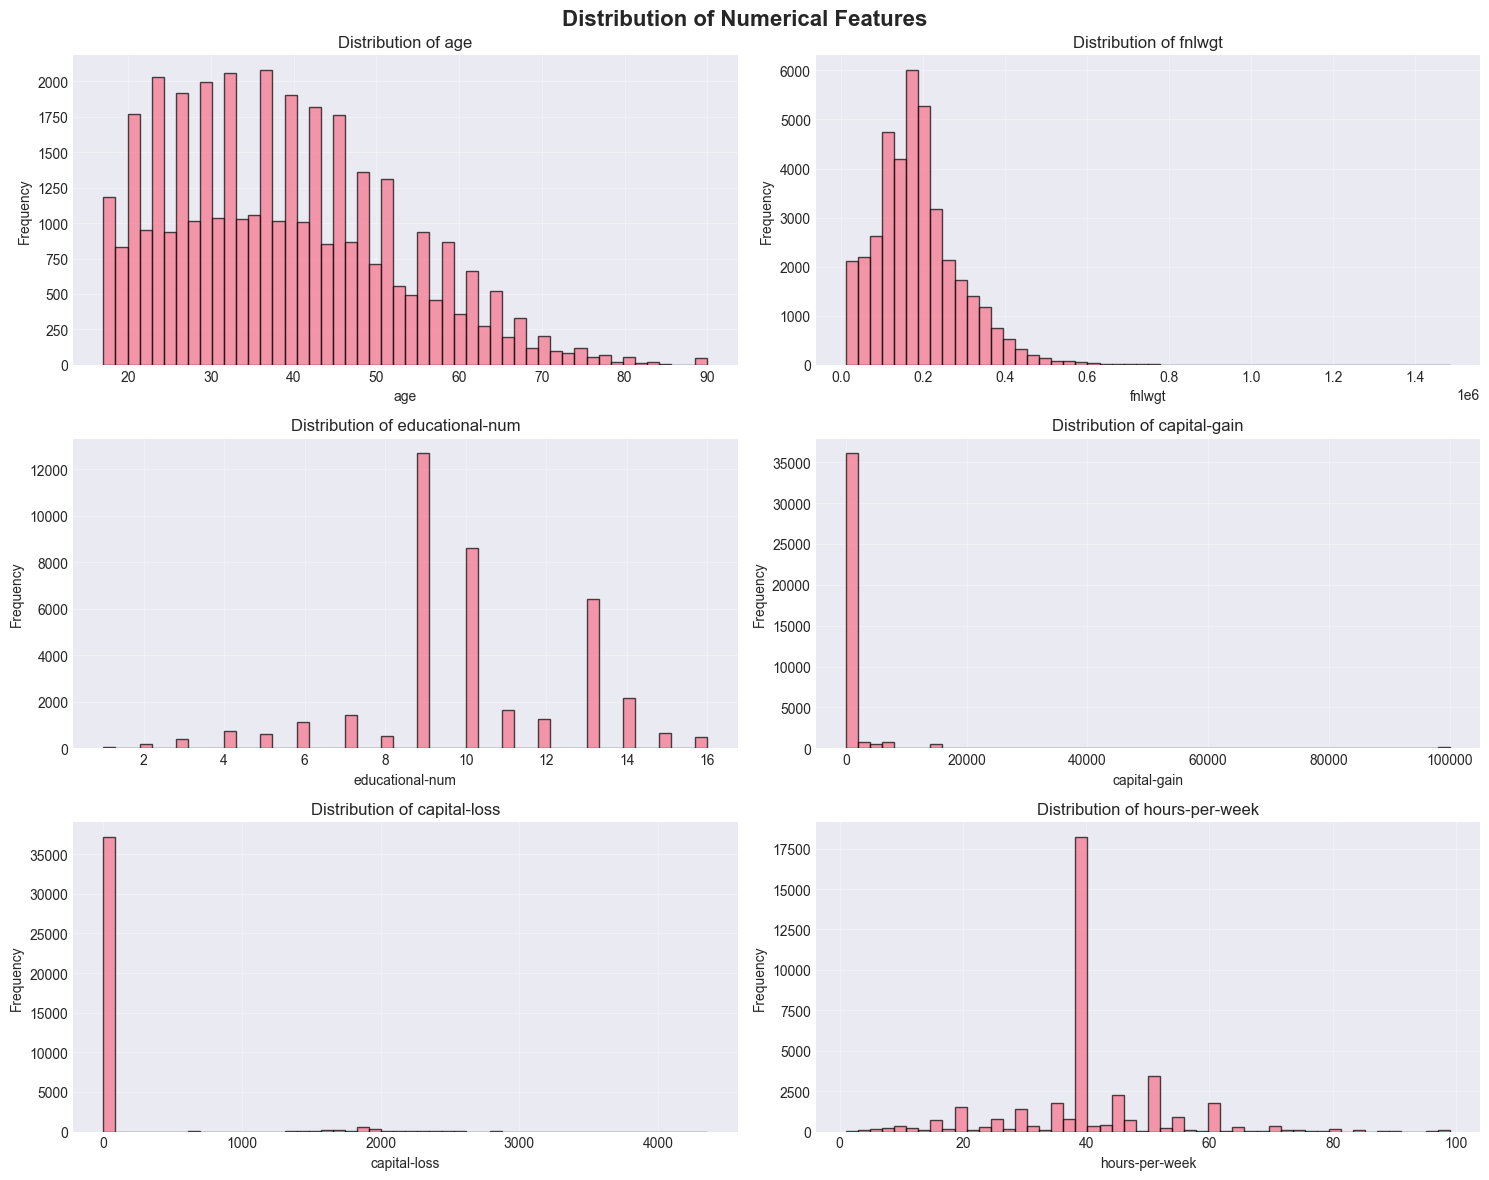

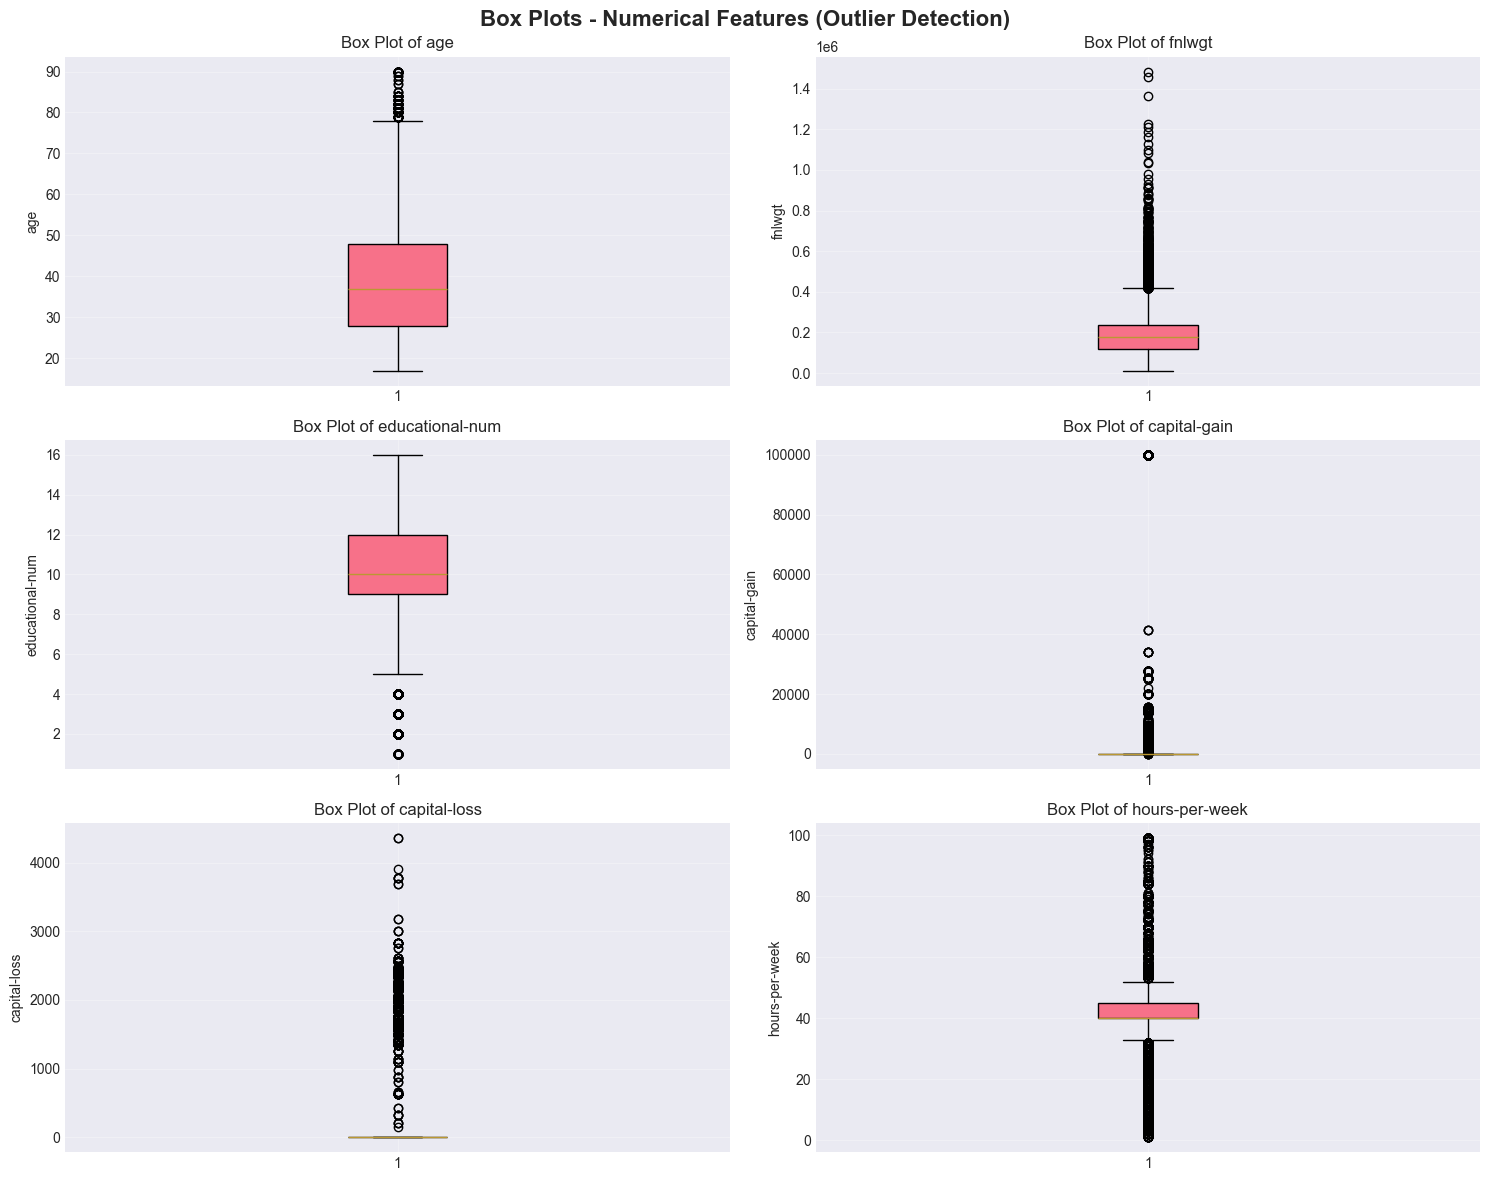

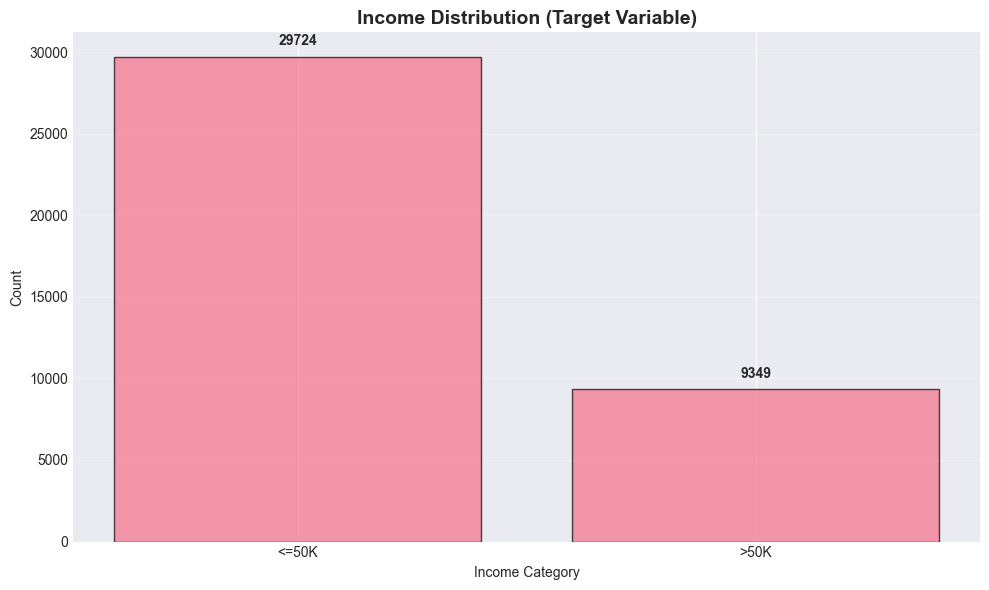

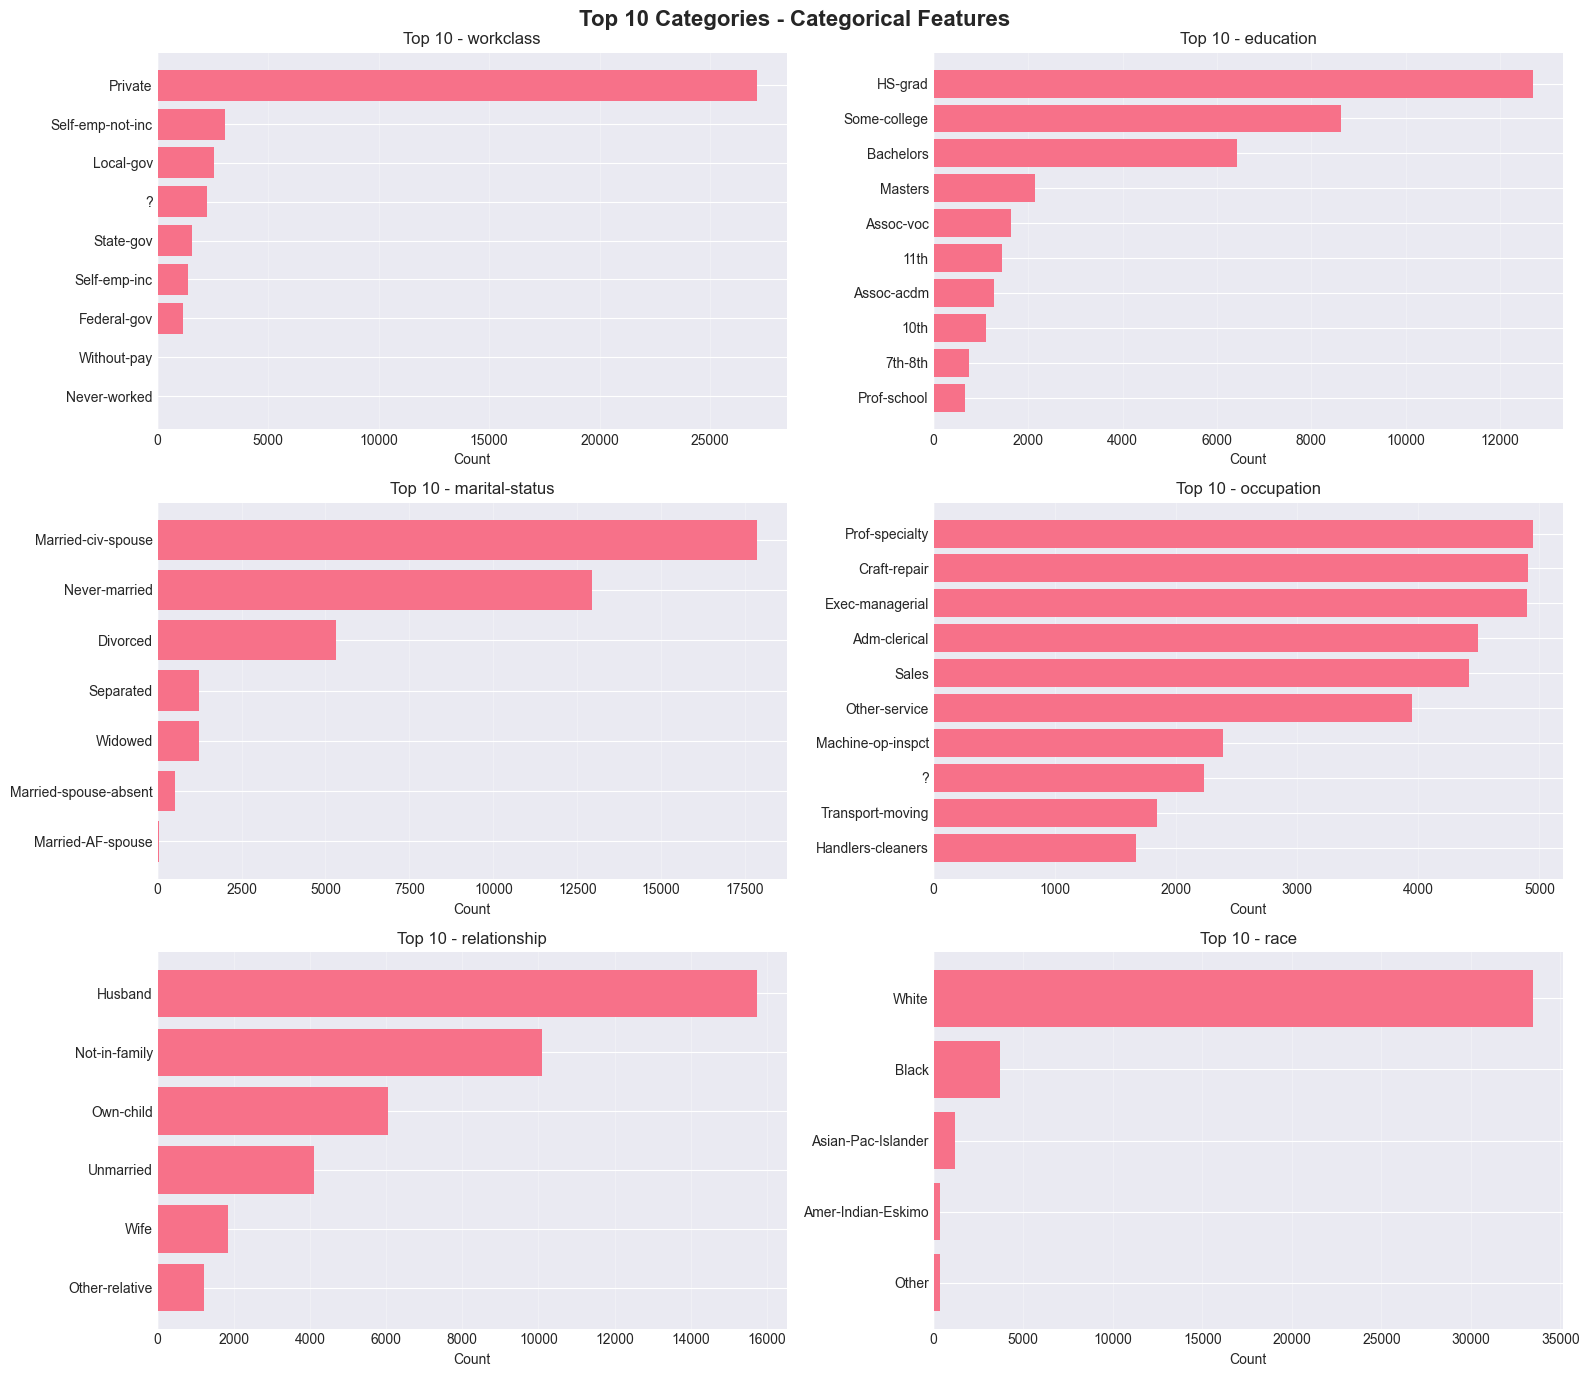

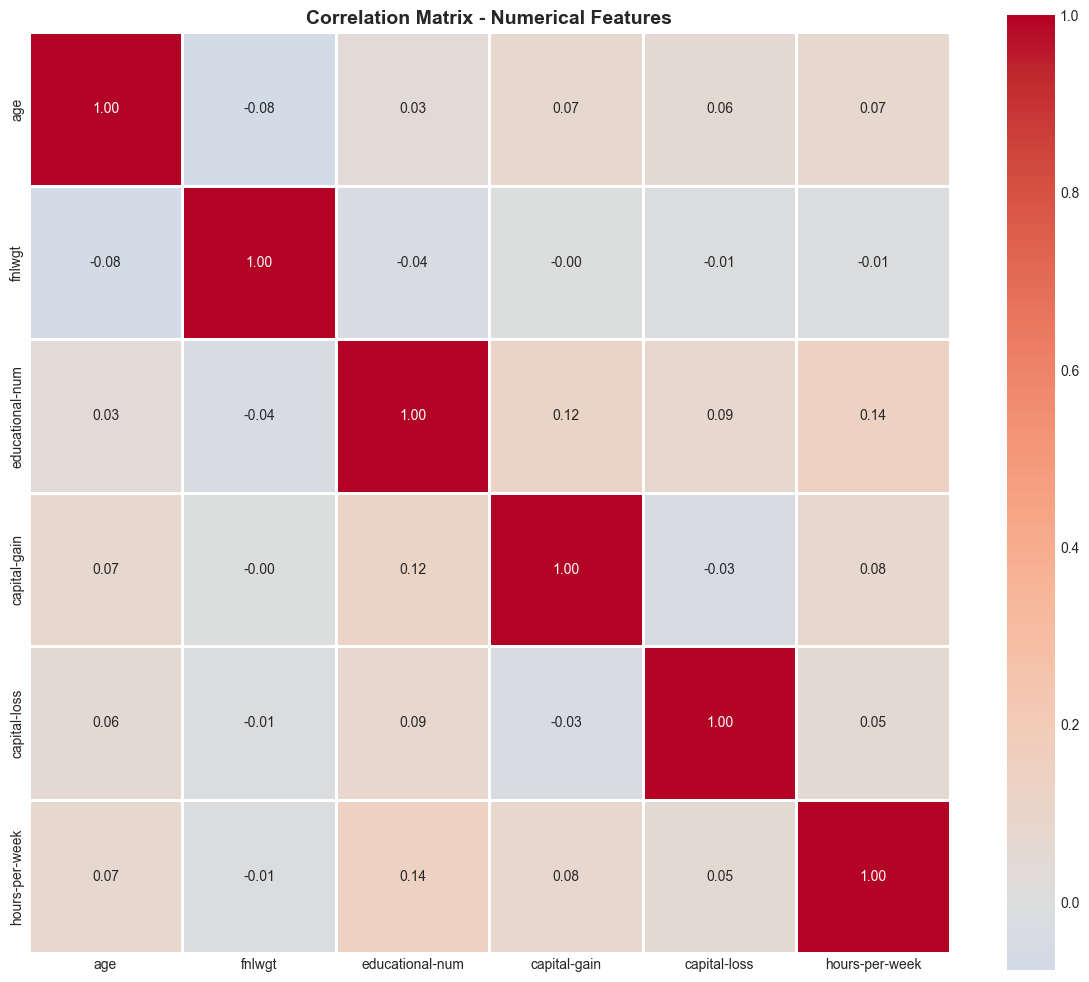

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.model_selection import train_test_split

warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Load the data
df = pd.read_csv(r'C:\Users\rohit\OneDrive\Desktop\BITSWILP\ML\Assignment-2\project-folder\model\data\adult_train.csv')

print("EXPLORATORY DATA ANALYSIS - ADULT DATASET (UCI)")
print("-" * 80)

# 1. BASIC INFORMATION
print("\n1. DATASET OVERVIEW")
print(f"Dataset Shape: {df.shape}")
print(f"Number of Rows: {df.shape[0]}")
print(f"Number of Columns: {df.shape[1]}")
print("-" * 80)

print("\n2. COLUMN INFORMATION")
print(df.info())
print("-" * 80)

print("\n3. FIRST FEW ROWS")
print(df.head(10))
print("-" * 80)

print("\n4. LAST FEW ROWS")
print(df.tail(10))
print("-" * 80)

# 2. DATA TYPES
print("\n5. DATA TYPES")
print(df.dtypes)

# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Columns ({len(numerical_cols)}): {numerical_cols}")
print(f"Categorical Columns ({len(categorical_cols)}): {categorical_cols}")

# 3. STATISTICAL SUMMARY
print("\n6. STATISTICAL SUMMARY - NUMERICAL FEATURES")
print("-" * 80)
print(df[numerical_cols].describe())

print("\n7. STATISTICAL SUMMARY - CATEGORICAL FEATURES")
print("-" * 80)
print(df[categorical_cols].describe())

# 4. MISSING VALUES
print("\n8. MISSING VALUES ANALYSIS")
print("-" * 80)
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_df = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
})

missing_df = missing_df[missing_df['Missing_Count'] > 0].sort_values('Missing_Count', ascending=False)
print(missing_df)

if missing_df.empty:
    print("No missing values found")

print("-" * 80)

# Check for '?' or whitespace values
print("\n9. CHECKING FOR '?' OR WHITESPACE VALUES")
for col in categorical_cols:
    question_marks = (df[col] == '?').sum()
    whitespace = (df[col].str.strip() == '').sum()
    if question_marks > 0 or whitespace > 0:
        print(f"{col}: {question_marks} '?' values, {whitespace} whitespace values")

print("-" * 80)

# 5. DUPLICATE ROWS
print("\n10. DUPLICATE ROWS")
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    print(f"Percentage of duplicates: {(duplicates/len(df))*100:.2f}%")

# 6. UNIQUE VALUES
print("\n11. UNIQUE VALUES COUNT")
print("-" * 80)
unique_counts = df.nunique().sort_values(ascending=False)
print(unique_counts)

# 7. TARGET VARIABLE ANALYSIS
print("\n12. TARGET VARIABLE DISTRIBUTION (income)")
print("-" * 80)
print(df['income'].value_counts())
print("\nPercentage Distribution:")
print(df['income'].value_counts(normalize=True) * 100)

# 8. CATEGORICAL FEATURES ANALYSIS
print("\n13. CATEGORICAL FEATURES DISTRIBUTION")
print("-" * 80)
for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(df[col].value_counts())
    print(f"Unique values: {df[col].nunique()}")

# 9. NUMERICAL FEATURES ANALYSIS
print("\n14. NUMERICAL FEATURES - DETAILED STATISTICS")
print("-" * 80)
for col in numerical_cols:
    print(f"\n{col.upper()}:")
    print(f"Mean: {df[col].mean():.2f}")
    print(f"Median: {df[col].median():.2f}")
    print(f"Std Dev: {df[col].std():.2f}")
    print(f"Min: {df[col].min():.2f}")
    print(f"Max: {df[col].max():.2f}")
    print(f"Skewness: {df[col].skew():.2f}")
    print(f"Kurtosis: {df[col].kurtosis():.2f}")

# 10. VISUALIZATIONS
print("\n15. GENERATING VISUALIZATIONS...")
print("-" * 80)

os.makedirs('eda_plots', exist_ok=True)

# 10.1 Distribution of Numerical Features
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Distribution of Numerical Features', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols[:6]):
    row = idx // 2
    col_idx = idx % 2
    axes[row, col_idx].hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    axes[row, col_idx].set_title(f'Distribution of {col}')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('eda_plots/01_numerical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# 10.2 Box plots for Numerical Features
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
fig.suptitle('Box Plots - Numerical Features (Outlier Detection)', fontsize=16, fontweight='bold')

for idx, col in enumerate(numerical_cols[:6]):
    row = idx // 2
    col_idx = idx % 2
    axes[row, col_idx].boxplot(df[col].dropna(), vert=True, patch_artist=True)
    axes[row, col_idx].set_title(f'Box Plot of {col}')
    axes[row, col_idx].set_ylabel(col)
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('eda_plots/02_boxplots_outliers.png', dpi=300, bbox_inches='tight')
plt.show()

# 10.3 Target Variable Distribution
plt.figure(figsize=(10, 6))
income_counts = df['income'].value_counts()
plt.bar(income_counts.index, income_counts.values, edgecolor='black', alpha=0.7)
plt.title('Income Distribution (Target Variable)', fontsize=14, fontweight='bold')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
for i, v in enumerate(income_counts.values):
    plt.text(i, v + 500, str(v), ha='center', va='bottom', fontweight='bold')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.savefig('eda_plots/03_target_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

# 10.4 Categorical Features Distribution
categorical_to_plot = [col for col in categorical_cols if col != 'income'][:6]
fig, axes = plt.subplots(3, 2, figsize=(16, 14))
fig.suptitle('Top 10 Categories - Categorical Features', fontsize=16, fontweight='bold')

for idx, col in enumerate(categorical_to_plot):
    row = idx // 2
    col_idx = idx % 2
    top_categories = df[col].value_counts().head(10)
    axes[row, col_idx].barh(range(len(top_categories)), top_categories.values)
    axes[row, col_idx].set_yticks(range(len(top_categories)))
    axes[row, col_idx].set_yticklabels(top_categories.index)
    axes[row, col_idx].set_title(f'Top 10 - {col}')
    axes[row, col_idx].set_xlabel('Count')
    axes[row, col_idx].invert_yaxis()
    axes[row, col_idx].grid(True, alpha=0.3, axis='x')

plt.tight_layout()
plt.savefig('eda_plots/04_categorical_distributions.png', dpi=300, bbox_inches='tight')
plt.show()

# 10.5 Correlation Matrix
plt.figure(figsize=(12, 10))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            fmt='.2f', linewidths=1, square=True)
plt.title('Correlation Matrix - Numerical Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig('eda_plots/05_correlation_matrix.png', dpi=300, bbox_inches='tight')
plt.show()

# 10.6 Age Distribution by Income
plt.figure(figsize=(12, 6))
for income_cat in df['income'].unique():
    subset = df[df['income'] == income_cat]['age']
    plt.hist(subset, bins=30, alpha=0.6, label=income_cat, edgecolor='black')
plt.title('Age Distribution by Income Category', fontsize=14, fontweight='bold')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('eda_plots/06_age_by_income.png', dpi=300, bbox_inches='tight')
plt.show()

# 10.7 Hours per week by Income
plt.figure(figsize=(12, 6))
df.boxplot(column='hours-per-week', by='income', figsize=(10, 6))
plt.title('Hours per Week by Income Category', fontsize=14, fontweight='bold')
plt.suptitle('')
plt.xlabel('Income Category')
plt.ylabel('Hours per Week')
plt.tight_layout()
plt.savefig('eda_plots/07_hours_by_income.png', dpi=300, bbox_inches='tight')
plt.show()

print("EDA Completed. Plots are saved in the 'eda_plots' directory.")

# Creating Train-Test Split (90/10)

Now we'll split the complete dataset into training (90%) and testing (10%) sets using stratified sampling to maintain the same income distribution in both sets. This ensures our model training and evaluation are done properly without any data leakage.

In [ ]:
# ================================
# Stratified 90/10 Train-Test Split
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from sklearn.model_selection import train_test_split

csv_path = r'C:\Users\rohit\OneDrive\Desktop\BITSWILP\ML\Assignment-2\gitcode\BITS_WILP_AIMLCZG565_Assignment2\model\data\adult.csv'
df = pd.read_csv(csv_path)

assert 'income' in df.columns, "Target column 'income' not found in dataframe"

print("Original income distribution (proportions):")
print(df['income'].value_counts(normalize=True))

train_df, test_df = train_test_split(
    df,
    test_size=0.10,
    stratify=df['income'],
    random_state=42
)

print(f"\nTrain shape: {train_df.shape}")
print(f"Test shape: {test_df.shape}")

print("\nTrain income distribution (proportions):")
print(train_df['income'].value_counts(normalize=True))

print("\nTest income distribution (proportions):")
print(test_df['income'].value_counts(normalize=True))

out_dir = r'C:\Users\rohit\OneDrive\Desktop\BITSWILP\ML\Assignment-2\gitcode\BITS_WILP_AIMLCZG565_Assignment2\model\data'
os.makedirs(out_dir, exist_ok=True)

train_path = os.path.join(out_dir, 'adult_train.csv')
test_path = os.path.join(out_dir, 'adult_test.csv')

train_df.to_csv(train_path, index=False)
test_df.to_csv(test_path, index=False)

print(f"\nSaved train -> {train_path}")
print(f"Saved test  -> {test_path}")


Original income distribution (proportions):
income
<=50K    0.760718
>50K     0.239282
Name: proportion, dtype: float64

Train shape: (43957, 15)
Test shape: (4885, 15)

Train income distribution (proportions):
income
<=50K    0.760721
>50K     0.239279
Name: proportion, dtype: float64

Test income distribution (proportions):
income
<=50K    0.760696
>50K     0.239304
Name: proportion, dtype: float64

Saved train -> C:\Users\rohit\OneDrive\Desktop\BITSWILP\ML\Assignment-2\gitcode\BITS_WILP_AIMLCZG565_Assignment2\model\data\adult_train.csv
Saved test  -> C:\Users\rohit\OneDrive\Desktop\BITSWILP\ML\Assignment-2\gitcode\BITS_WILP_AIMLCZG565_Assignment2\model\data\adult_test.csv
